In [1]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
# array contains all the flowResult files which belongs to this MUD flow
# DUP
all_files = [
             "AwairAirQuality_70886b100fc6.pcap", 
             "LiFXBulb_d073d5018308.pcap", 
             "PixStarPhotoFrame_e076d033bb85.pcap", 
             "RingDoorBell_884aea31669d.pcap",
             "TPLinkCamera_f4f26D9351f1.pcap", 
             "TribySpeaker_18B79E022044.pcap", 
             "AmazonEcho/DUP_CONCATANATED_AmazonEcho_44650d56ccd3", 
             "NestProtect/DUP_CONCATANATED_NestProtect_18b43025bee4",
             "WithingsSleepSensor/DUP_CONCATANATED_WithingsSleepSensor_0024e42028c6"
             ]    

In [3]:
# paths of other files
# path = ""
path = "V3/numberOfMatches_with_Metadata/"    
statType = "_numberOfMatches_with_metadata.csv"

In [4]:
# loading all the files as pandas dataframes
all_dfs = []

for filename in all_files:
    df = pd.read_csv("../../../data/statistics/" + path + filename + statType)
    all_dfs.append(df)

In [5]:
# Global plot pattern for the entire notebook

# plotPattern = 'scatter'
plotPattern = 'hist'

# cmap = "viridis"
# cmap = "inferno"
# cmap = "bwr"
# cmap = "RdBu"
cmap = "RdYlBu"

# cbar = True
cbar = False

# log scale for the bin values of the histograms
scale = 10

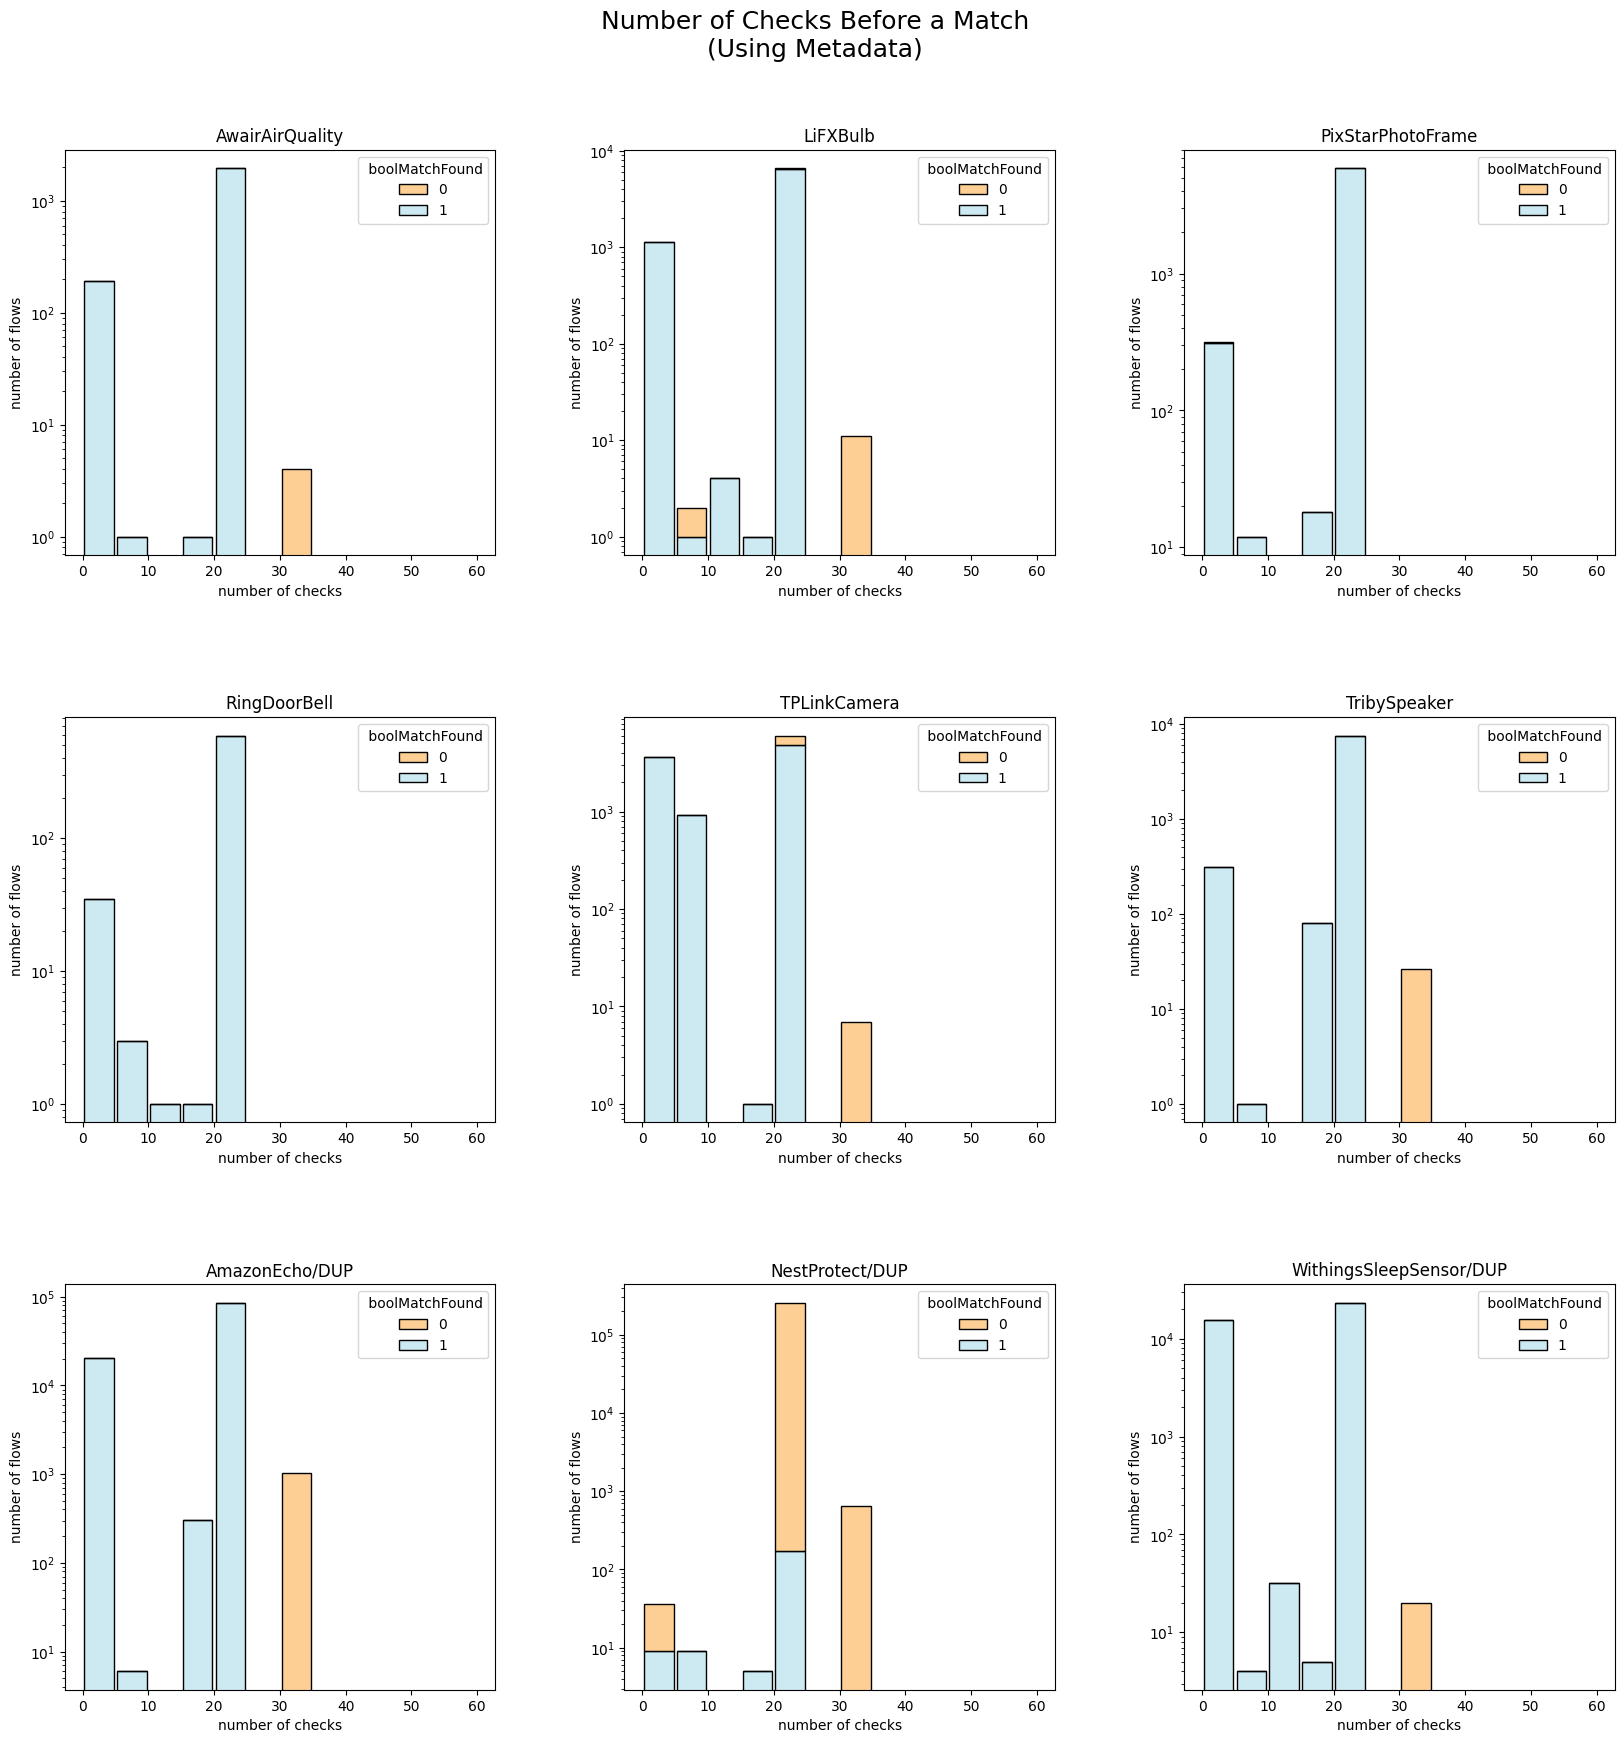

In [6]:
# define subplot grid
plotRows = math.ceil(len(all_dfs) / 3)
plotCols = 3


fig, axs = plt.subplots(nrows=plotRows, ncols=plotCols, figsize=(20, 20))
plt.subplots_adjust(hspace=.4, wspace=.3)
fig.suptitle("Number of Checks Before a Match\n(Using Metadata)", fontsize=18, y=0.95)

pos = 0
for df, ax in zip(all_dfs, axs.ravel()):
    # filter df for ticker and plot on specified axes
    # df.plot(ax=ax, x='ipFlow', y=' # of matches', c=' boolMatchFound', edgecolor='k', s=20, linewidths=.5, alpha=1, kind=plotPattern)
    # df[' boolMatchFound'] = pd.Categorical(df[' boolMatchFound'])
    # df.plot(ax=ax, x='ipFlow', y=' # of matches', c=' boolMatchFound', colormap=cmap, kind=plotPattern, colorbar=cbar)

    if plotPattern == "hist":
        sns.histplot(ax=ax, data=df, x=' # of matches', hue=' boolMatchFound', multiple='stack', shrink=.9, bins=12, binrange=(0,60), palette=cmap, log_scale=(None,scale))
        ax.set_xlabel("number of checks")
        ax.set_ylabel("number of flows")

    else:
        df[' boolMatchFound'] = pd.Categorical(df[' boolMatchFound'])
        df.plot(ax=ax, x='ipFlow', y=' # of matches', c=' boolMatchFound', colormap=cmap, kind=plotPattern, colorbar=cbar)


    ax.set_title(all_files[pos].split("_")[0])
    pos+=1
    # chart formatting

plt.show()

#### Concatanating all the dataframes to get a single one for all the pcaps

In [7]:
total_df = pd.concat(all_dfs, axis=0, ignore_index=True)
display(total_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436774 entries, 0 to 436773
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   ipFlow           436774 non-null  int64
 1    # of matches    436774 non-null  int64
 2    boolMatchFound  436774 non-null  int64
dtypes: int64(3)
memory usage: 10.0 MB


None

In [8]:
total_df.info()
print(total_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436774 entries, 0 to 436773
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   ipFlow           436774 non-null  int64
 1    # of matches    436774 non-null  int64
 2    boolMatchFound  436774 non-null  int64
dtypes: int64(3)
memory usage: 10.0 MB
Index(['ipFlow', ' # of matches', ' boolMatchFound'], dtype='object')


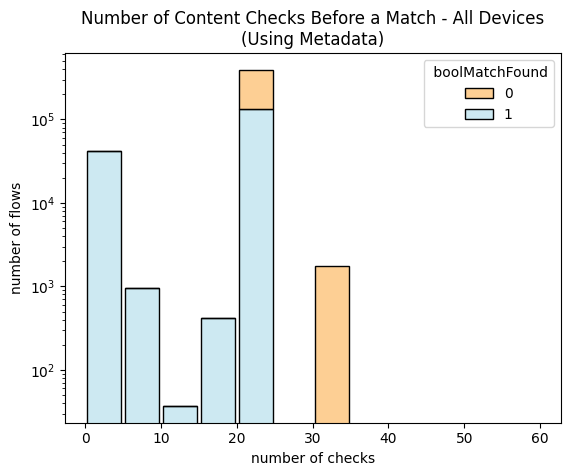

In [9]:
if plotPattern == "hist":
    ax = sns.histplot(data=total_df, x=' # of matches', hue=' boolMatchFound', multiple='stack', shrink=.9, bins=12, binrange=(0,60), palette=cmap, log_scale=(None,scale))
    ax.set_xlabel("number of checks")
    ax.set_ylabel("number of flows")
    ax.set_title("Number of Content Checks Before a Match - All Devices\n(Using Metadata)")
else:
    total_df[' boolMatchFound'] = pd.Categorical(total_df[' boolMatchFound'])
    ax = total_df.plot(x='ipFlow', y=' # of matches', c=' boolMatchFound', colormap=cmap, kind=plotPattern, colorbar=cbar, title="Without Using Ports")

plt.show()
